In [106]:
import pandas as pd

invoice = pd.read_csv('fct_invoice.csv')
customer = pd.read_json('dim_customer.json')

In [94]:
merged = pd.merge(invoice, customer, left_on='customer_id', right_on='id', how='inner')

# How many unique customers are in the dataset?

In [86]:
customer['id'].nunique()

5191

# What are the different categories of products available? How many unique categories are there?

In [90]:
invoice['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [71]:
invoice['category'].nunique()

8

# Which payment method is the most popular? How many times was it used?

In [79]:
invoice['payment_method'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

#  What are the three most popular categories, by total sales?

In [92]:
invoice.groupby('category').sum(numeric_only=True)['quantity']

category
Books               14982
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Shoes               30217
Souvenir            14871
Technology          15021
Toys                30321
Name: quantity, dtype: int64

#  What are the total sales attributed to customers over the age of 45?

In [103]:
merged[merged['age'] > 45]['quantity'].sum()

97629

# How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)


In [202]:
merged['DTYear'] = pd.to_datetime(merged['invoice_date'], format='%d/%m/%Y')
merged['DTYear']
merged['month'] = merged['DTYear'].dt.month

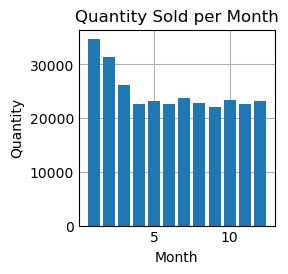

In [201]:
import matplotlib.pyplot as plt

grouped_data = merged.groupby('month')['quantity'].sum()

plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Sold per Month')
plt.show()


# Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [200]:
merged['age_range'] = pd.cut(merged['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90], labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])

In [199]:
pivot_table = merged.pivot_table(index='category', columns='age_range', values='quantity', aggfunc='sum')
pivot_table

age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,351,1443,1522,1471,1438,1354,1031,409
Clothing,2722,9233,10391,9996,9802,9080,7154,3401
Cosmetics,1178,3999,4865,4382,4214,3990,2884,1470
Food & Beverage,1067,3929,4651,4443,4106,3968,2894,1328
Shoes,638,2810,3181,3035,2832,2471,2134,951
Souvenir,458,1267,1487,1488,1352,1215,907,475
Technology,438,1313,1607,1518,1222,1386,964,400
Toys,748,2841,3259,2891,2747,2593,2179,983
